<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-practice/blob/main/zero_initialization_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/concertriccir2.csv')

In [ ]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


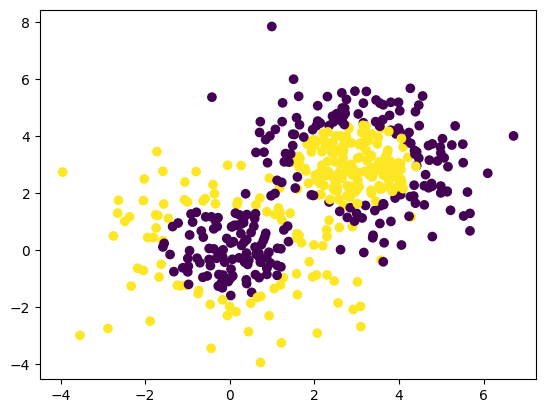

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
x = df.iloc[:,0:2].values
y = df.iloc[:, -1].values

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense



In [ ]:
# model = Sequential()
# model.add(Dense(2, activation='relu', input_dim=2))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()

model = Sequential()
model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set parameters to 0
model.get_weights()

[array([[ 0.8645984 ,  0.03756487],
        [ 1.0292574 , -0.49419487]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.0772344],
        [0.752277 ]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights = model.get_weights()


In [ ]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
history = model.fit(x,y, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5182 - loss: 0.6932 - val_accuracy: 0.5700 - val_loss: 0.6930
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4843 - loss: 0.6932 - val_accuracy: 0.4300 - val_loss: 0.6933
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5329 - loss: 0.6931 - val_accuracy: 0.4300 - val_loss: 0.6934
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5307 - loss: 0.6930 - val_accuracy: 0.4300 - val_loss: 0.6935
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5133 - loss: 0.6931 - val_accuracy: 0.4300 - val_loss: 0.6937
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5174 - loss: 0.6930 - val_accuracy: 0.4300 - val_loss: 0.6939
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5642 - loss: 0.6925 - val_accuracy: 0.4300 - val_loss: 0.6941
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5022 - loss: 0.6931 - val_accuracy: 0.4300 

In [ ]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.06823294], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


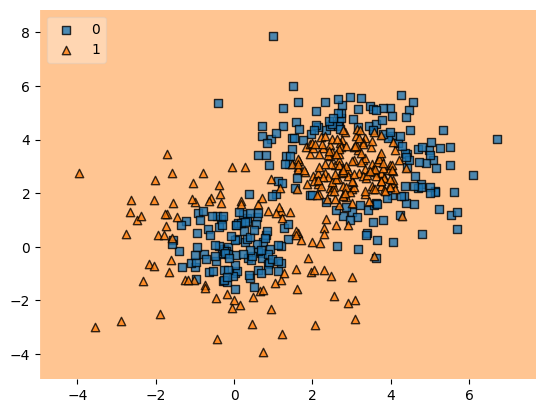

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int') ,clf=model, legend=2)
plt.show()